# Práctica 1. Aprendizaje automático

Grupo 16: Adina Han, Diego Ambite 

## Parte 3: Regresión

0. Antes de empezar vamos a eliminar la variable “Region” del conjunto de datos, ya que no la usaremos para predecir.
Además, utiliza la función dropna que elimina de un data frame todas las filas (es decir, observaciones) que tienen un valor perdido (na quiere decir not available) para alguna variable. De esta forma, no tendrás que preocuparte por imputar un valor a dichas observaciones. Asegúrate de que el dataframe resultante no tiene la variable Region, ni valores perdidos.

In [85]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
countries = pd.read_csv('countries.csv', index_col = 0) 
countries['GDP'] = countries['GDP (USD per capita)']
countries.drop(['GDP (USD per capita)'], axis='columns', inplace=True)
countries.head()


,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,700.0
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,4500.0
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6000.0
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,8000.0
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,19000.0


In [69]:
countries.drop(['Region'], axis='columns', inplace=True)

In [70]:
countries.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01
Crops (%),225.0,4.564222e+00,8.361470e+00,0.000,0.19000,1.030,4.440000e+00,5.068000e+01


In [71]:
countries.dropna()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,700.0
Albania,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,4500.0
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,6000.0
Anguilla,13477,102,132.1,59.80,10.76,21.03,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780,8600.0
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743,11000.0
Argentina,39921833,2766890,14.4,0.18,0.61,15.18,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547,11200.0
Armenia,2976372,29800,99.9,0.00,-6.47,23.28,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,3500.0
Aruba,71891,193,372.5,35.49,0.00,5.89,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663,28000.0
Australia,20264082,7686850,2.6,0.34,3.98,4.69,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700,29000.0


*Tras cargar el fichero y realizar las modificaciones requeridas podemos observar el Conjunto de datos sin la variable región ni valores not avaliables*

1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, especialmente a la matriz de gráficos de dispersión y al coeficiente de correlación de la variable objetivo (GDP) con el resto de variables. ¿Hay variables que tengan una relación clara con ella?

*El conjunto descibre, para un total de 227 paises, su situacion con respecto a un conjunto de 18 caracteristicas, como si poblacion, su area en millas cuadradas, su densidad de poblacion en personas por milla cuadrada de territorio...
A continuacion se muestra la  totalidad de las caracteristicas y las unidades usadas para ello.*

In [72]:
countries.keys()

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service', 'GDP'],
      dtype='object')

*De entre ellas vamos a seleccionar los que consideramos que estan mas relacionados con el GDP para realizar un estudio mas pormenorizado de ellos.*

In [79]:
correl=countries.corr()
correl['GDP']

Population                           -0.039324
Area (sq. mi.)                        0.072185
Pop. Density (per sq. mi.)            0.195773
Coastline (coast/area ratio)          0.049118
Net migration                         0.382461
Infant mortality (per 1000 births)   -0.600774
Literacy (%)                          0.513144
Phones (per 1000)                     0.834499
Arable (%)                            0.019768
Crops (%)                            -0.219229
Other (%)                             0.097828
Climate                               0.340791
Birthrate                            -0.650137
Deathrate                            -0.201661
Agriculture                          -0.586769
Industry                             -0.028926
Service                               0.550216
GDP                                   1.000000
Name: GDP, dtype: float64

In [111]:
correl[correl['GDP'] > 0.3]['GDP'].sort_values(ascending=False).drop('GDP')

Phones (per 1000)    0.834499
Service              0.550216
Literacy (%)         0.513144
Net migration        0.382461
Climate              0.340791
Name: GDP, dtype: float64

*Como podemos observar las mas correlacionadas con el GDP son las que tienen un valor mas alto, que son las siguientes:*
    * Phones (per 1000)
    * Birthrate
    * Infant mortality (per 1000 births)
    * Agriculture
    * Service 
    * Literacy (%)

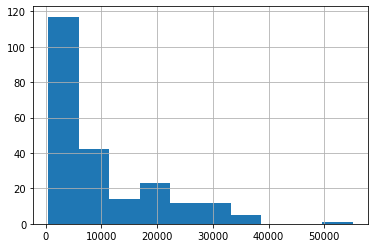

In [83]:
countries.GDP.hist()

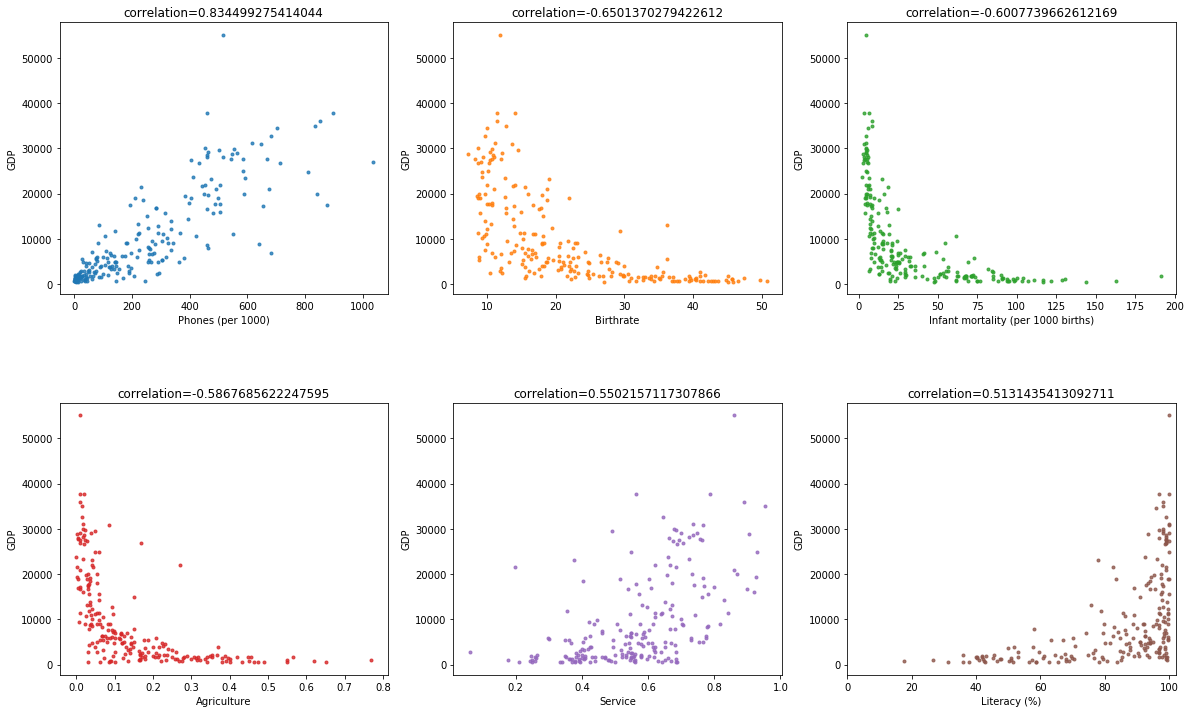

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in countries.columns.values[2:]:
    if ((col!='GDP')&(col!='Climate')):
        corr_to_gdp[col] = countries['GDP'].corr(countries[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP', data=countries,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

2. Establece un criterio en base al coeficiente de correlación para filtrar aquellas variables que tengan poca relación (ya sea directa o inversa) con la variable objetivo. Di qué variables pasan tu filtro y qué coeficiente de correlación tienen con ella.

In [113]:
correl[correl['GDP'] < 0.0]['GDP'].sort_values(ascending=True)

Birthrate                            -0.650137
Infant mortality (per 1000 births)   -0.600774
Agriculture                          -0.586769
Crops (%)                            -0.219229
Deathrate                            -0.201661
Population                           -0.039324
Industry                             -0.028926
Name: GDP, dtype: float64

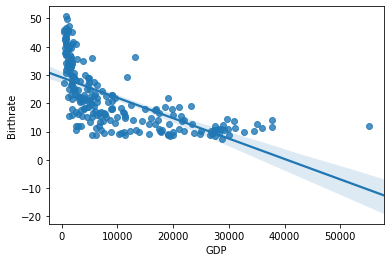

In [88]:
sns.regplot(x="GDP", y="Birthrate", data = countries)

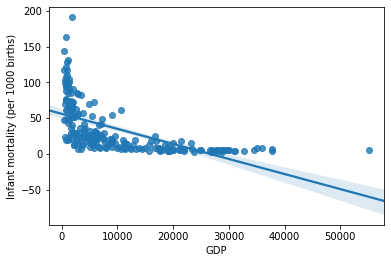

In [90]:
sns.regplot(x="GDP", y="Infant mortality (per 1000 births)", data = countries)

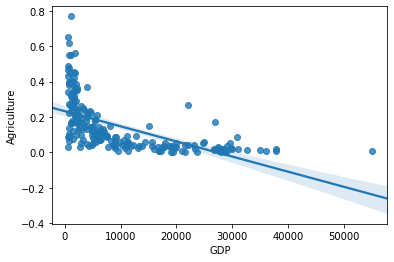

In [91]:
sns.regplot(x="GDP", y="Agriculture", data = countries)

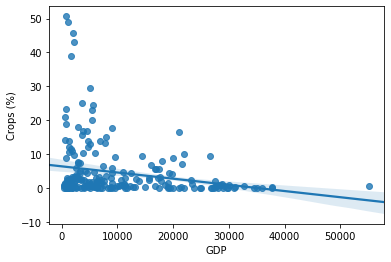

In [93]:
sns.regplot(x="GDP", y="Crops (%)", data = countries)

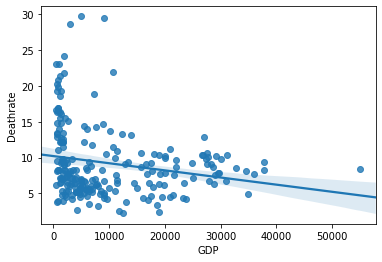

In [92]:
sns.regplot(x="GDP", y="Deathrate", data = countries)

3. Considera si debes normalizar o estandarizar las variables antes para usar un perceptrón multicapa de decisión. Razona tu elección.

4. Configura una validación cruzada con k=5 y dos perceptrones multicapa

      • MLP1 con una capa oculta de 200 neuronas

      • MLP2 con dos capas ocultas de 50 neuronas cada una

Pinta la curva de aprendizaje para cada perceptrón variando el parámetro alpha que controla el aprendizaje del perceptrón y determina el valor óptimo (es decir aquel que maximiza el Mean Square Error en negativo).
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).
¿Alguno de los dos perceptrones domina al otro? ¿Por qué crees que se producen las diferencias?

5. Entrena el perceptrón elegido con todo el conjunto de datos y genera las predicciones del GDP que hace el perceptrón para todo los países.
A continuación, píntalas en un diagrama de dispersión frente a los valores observados para el GDP (en el eje Y) y pinta la recta que se genera con la predicción perfecta de todos los valores.
Detecta países para los cuales el perceptrón a infraestimado más su GDP (aproximadamente). Idem con países donde se ha sobreestimado mucho su GDP. ¿Puedes aventurar alguna razón por la que esos países tienen más (o menos) GDP del que el perceptrón les asigna? ¿Es realmente un problema del perceptrón o eres capaz de ver alguna razón económica, política o social?